In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import pandas as pd
import time

# **LOADING DATASET**


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
file_path = '/content/drive/MyDrive/cao_project/input_test.csv'
df = pd.read_csv(file_path)
X_test = np.loadtxt(file_path,delimiter =',')

In [5]:
file_path2 = '/content/drive/MyDrive/cao_project/input.csv'
df = pd.read_csv(file_path2)
X_train = np.loadtxt(file_path2,delimiter =',')


In [6]:
file_path3 = '/content/drive/MyDrive/cao_project/labels.csv'
df = pd.read_csv(file_path3)
Y_train = np.loadtxt(file_path3,delimiter =',')

In [7]:
file_path4 = '/content/drive/MyDrive/cao_project/labels_test.csv'
df = pd.read_csv(file_path4)
Y_test = np.loadtxt(file_path4,delimiter =',')

In [8]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


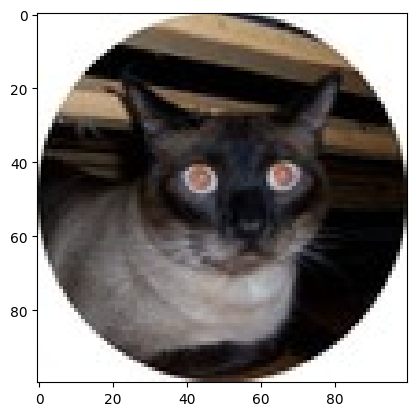

In [10]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# **MODEL**

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
start=time.time()
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
end=time.time()

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4844 - loss: 0.7717
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5826 - loss: 0.6911
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5833 - loss: 0.6739
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6609 - loss: 0.6202
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6605 - loss: 0.6199


In [15]:
print(f"Training time with GPU {end-start:.2f} seconds")

Training time with GPU 9.62 seconds


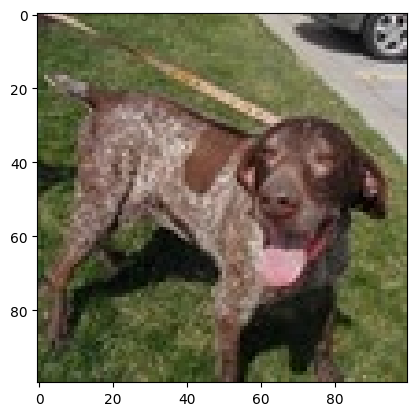

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Our model says it is a : dog


In [18]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)

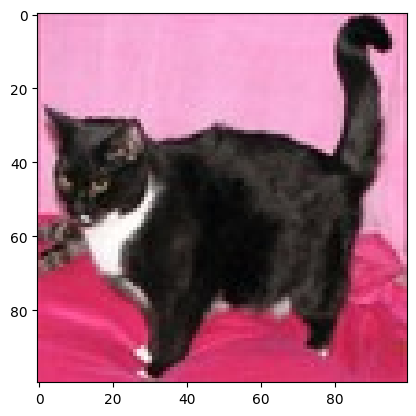

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Our model says it is a : cat


In [20]:
idx3 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx3, :])
plt.show()

y_pred = model.predict(X_test[idx3, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :", pred)